MAX ATTTRIBUTES ARE TAKEN

In [424]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [425]:
df = pd.read_csv('ACFG_All_R_B_Networkx.csv')

In [426]:
df = df.sample(frac = 1)
df.head()

,Hash Value,Nodes,Edges,Highest-Indegree,Hightes-Outdegree,Highest-Degree,Average Degree,Network diameter,Graph Density,Average Authority Score,...,Median No of numeric constants,Std No of function calls,Std No of logical calls,Std No of Arithmetic instructions,Std No of transfer instructions,Std No of move instructions,Std No of compare instructions,Std Total No of instructions,Std No of numeric constants,Class
34,795be391d2d68d9965a0904e500f4ed0bf144f20d60d8e...,141,158,6,2,7,1.120567,56,0.008004,0.007092,...,0.0,0.368641,0.734564,0,0.499564,1.612597,0.369665,4.281967,1.103886,Ransom
228,206400,414,539,7,3,8,1.301932,30,0.003152,0.002415,...,0.0,0.434307,0.509812,0,0.476867,1.495252,0.384138,2.997575,0.673943,Benign
159,464673,294,418,8,2,10,1.421769,28,0.004852,0.003401,...,1.0,0.446257,0.551203,0,0.453917,2.139916,0.432296,2.945362,0.955751,Benign
236,183424,429,536,6,3,7,1.249417,43,0.002919,0.002331,...,0.0,0.463995,0.544723,0,0.435851,1.625582,0.372066,2.349804,0.622724,Benign
226,456648,412,533,7,3,8,1.293689,28,0.003148,0.002427,...,0.0,0.439805,0.670196,0,0.457094,1.318810,0.380271,2.336701,0.748565,Benign


In [427]:
df.isnull().sum()

Hash Value                        0
Nodes                             0
Edges                             0
Highest-Indegree                  0
Hightes-Outdegree                 0
                                 ..
Std No of move instructions       0
Std No of compare instructions    0
Std Total No of instructions      0
Std No of numeric constants       0
Class                             0
Length: 61, dtype: int64

In [428]:
X = df.drop(['Hash Value','Class'],axis = 1)
X

,Nodes,Edges,Highest-Indegree,Hightes-Outdegree,Highest-Degree,Average Degree,Network diameter,Graph Density,Average Authority Score,Average Hub Score,...,Median Total No of instructions,Median No of numeric constants,Std No of function calls,Std No of logical calls,Std No of Arithmetic instructions,Std No of transfer instructions,Std No of move instructions,Std No of compare instructions,Std Total No of instructions,Std No of numeric constants
34,141,158,6,2,7,1.120567,56,0.008004,0.007092,0.007092,...,3.0,0.0,0.368641,0.734564,0,0.499564,1.612597,0.369665,4.281967,1.103886
228,414,539,7,3,8,1.301932,30,0.003152,0.002415,0.002415,...,2.0,0.0,0.434307,0.509812,0,0.476867,1.495252,0.384138,2.997575,0.673943
159,294,418,8,2,10,1.421769,28,0.004852,0.003401,0.003401,...,2.0,1.0,0.446257,0.551203,0,0.453917,2.139916,0.432296,2.945362,0.955751
236,429,536,6,3,7,1.249417,43,0.002919,0.002331,0.002331,...,2.0,0.0,0.463995,0.544723,0,0.435851,1.625582,0.372066,2.349804,0.622724
226,412,533,7,3,8,1.293689,28,0.003148,0.002427,0.002427,...,2.0,0.0,0.439805,0.670196,0,0.457094,1.318810,0.380271,2.336701,0.748565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,259,369,7,2,7,1.424710,27,0.005522,0.003861,0.003861,...,2.0,0.0,0.480538,0.463476,0,0.396073,1.689179,0.374048,2.683230,0.621346
160,296,398,8,3,9,1.344595,30,0.004558,0.003378,0.003378,...,2.0,0.0,0.437103,0.553597,0,0.451049,1.282459,0.413374,2.286546,0.692363
117,125,172,5,2,6,1.376000,14,0.011097,0.008000,0.008000,...,2.0,0.0,0.480608,0.463590,0,0.395660,1.688848,0.373548,2.681484,0.622770
329,4026,5240,14,3,16,1.301540,110,0.000323,0.000248,0.000248,...,2.0,0.0,0.439659,0.459226,0,0.371133,1.575436,0.408601,2.844187,0.656998


In [429]:
y= df['Class']
y

34     Ransom
228    Benign
159    Benign
236    Benign
226    Benign
        ...  
134    Benign
160    Benign
117    Benign
329    Benign
338    Benign
Name: Class, Length: 345, dtype: object

In [430]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
y

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

# Without Normalisation

Random Forest Classifier

In [431]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed

# Train the model
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

In [432]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Get feature importances
importances = clf.feature_importances_

# Sort feature importances in descending order
sorted_idx = np.argsort(importances)[::-1]

# Print feature importances
print("Feature Importances:")
for i in range(X.shape[1]):
    print(f"{i+1}. Feature '{X.columns[sorted_idx[i]]}': {importances[sorted_idx[i]]}")


Accuracy: 0.9655172413793104
Feature Importances:
1. Feature 'Mean Total No of instructions': 0.11166842431470063
2. Feature 'Max Total No of instructions': 0.0771819984922081
3. Feature 'Average betweenness centrality': 0.07242250813458669
4. Feature 'Std Total No of instructions': 0.06989382371555568
5. Feature 'Mean No of numeric constants': 0.06948818073760765
6. Feature 'Average Degree': 0.06947450927195976
7. Feature 'Mean No of logical calls': 0.04944849800843813
8. Feature 'Std No of numeric constants': 0.044228210070050115
9. Feature 'Average Harmonic Closeness Centrality': 0.03869777648614793
10. Feature 'Average Closeness Centrality': 0.036342486594314896
11. Feature 'Max No of numeric constants': 0.029253670771213817
12. Feature 'Average Eigenvector Centrality': 0.02780024544059915
13. Feature 'Median No of numeric constants': 0.027782095168070092
14. Feature 'Max No of logical calls': 0.023467691825399123
15. Feature 'Std No of logical calls': 0.019561175496371444
16. Feat

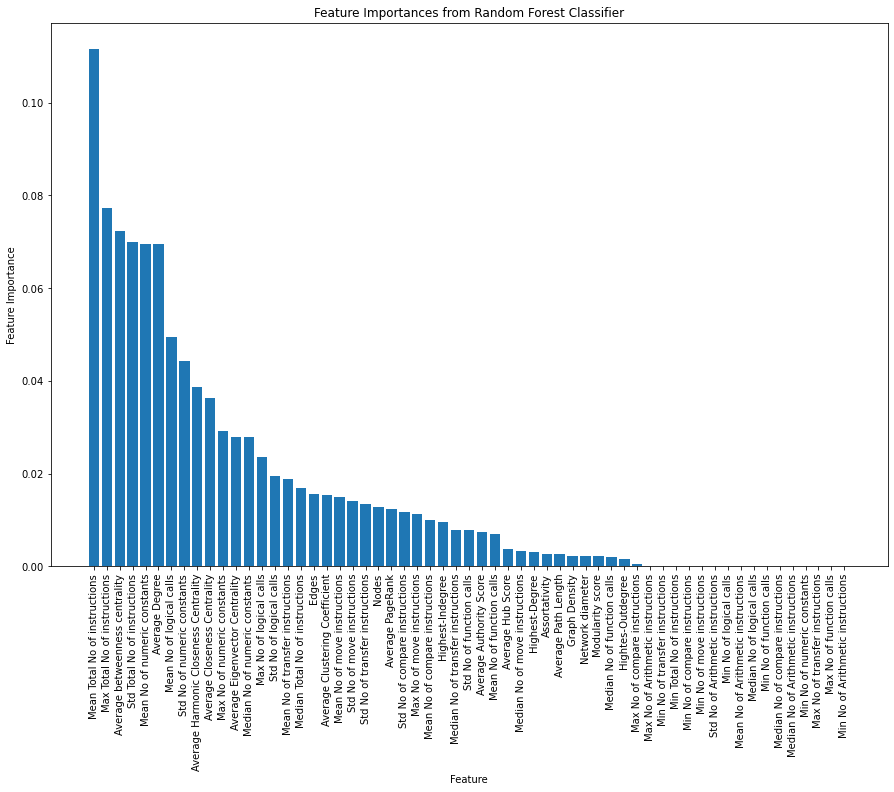

In [433]:
plt.figure(figsize=(15,10))
plt.bar(range(X.shape[1]), importances[sorted_idx])
plt.xticks(range(X.shape[1]), X.columns[sorted_idx], rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importances from Random Forest Classifier')
plt.show()

In [434]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 10-fold cross-validation
k = 10
scores = cross_val_score(rf_classifier, X, y, cv=k)

# Print the accuracy for each fold
for i in range(k):
    print(f"Fold {i+1} accuracy: {scores[i]:.4f}")

# Print the average accuracy across all folds
print(f"Average accuracy: {scores.mean():.4f}")


Fold 1 accuracy: 1.0000
Fold 2 accuracy: 1.0000
Fold 3 accuracy: 1.0000
Fold 4 accuracy: 1.0000
Fold 5 accuracy: 0.9714
Fold 6 accuracy: 1.0000
Fold 7 accuracy: 1.0000
Fold 8 accuracy: 0.9706
Fold 9 accuracy: 1.0000
Fold 10 accuracy: 1.0000
Average accuracy: 0.9942


Svm Classifier

In [435]:
from sklearn.svm import SVC 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
model = SVC(C=1000)
model.fit(X_train, y_train)

SVC(C=1000)

In [436]:
y_pred = model.predict(X_test)

In [437]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9080459770114943


In [438]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

svm_classifier = SVC(C=1000)

k = 10
scores = cross_val_score(svm_classifier, X, y, cv=k)

# Print the accuracy for each fold
for i in range(k):
    print(f"Fold {i+1} accuracy: {scores[i]:.4f}")

# Print the average accuracy across all folds
print(f"Average accuracy: {scores.mean():.4f}")

Fold 1 accuracy: 0.9714
Fold 2 accuracy: 0.8286
Fold 3 accuracy: 0.9714
Fold 4 accuracy: 0.9429
Fold 5 accuracy: 1.0000
Fold 6 accuracy: 0.8824
Fold 7 accuracy: 0.9706
Fold 8 accuracy: 0.9706
Fold 9 accuracy: 0.9118
Fold 10 accuracy: 0.9118
Average accuracy: 0.9361


Neural Network Model

In [439]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from numpy import unique,argmax

In [440]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25)
n_features = X.shape[1]
n_class = len(unique(y))

In [441]:
model = Sequential()
model.add(Dense(20, input_dim=n_features, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(n_class, activation='softmax'))

In [442]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [443]:
model.fit(xtrain, ytrain, validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
18/18 [==============================] - 1s 12ms/step - loss: 95.2726 - accuracy: 0.3081 - val_loss: 34.9993 - val_accuracy: 0.3256
Epoch 2/150
18/18 [==============================] - 0s 4ms/step - loss: 8.4162 - accuracy: 0.6977 - val_loss: 10.6956 - val_accuracy: 0.8140
Epoch 3/150
18/18 [==============================] - 0s 4ms/step - loss: 5.2328 - accuracy: 0.5465 - val_loss: 2.6918 - val_accuracy: 0.6860
Epoch 4/150
18/18 [==============================] - 0s 4ms/step - loss: 3.0807 - accuracy: 0.7326 - val_loss: 4.8387 - val_accuracy: 0.4767
Epoch 5/150
18/18 [==============================] - 0s 4ms/step - loss: 3.4407 - accuracy: 0.6977 - val_loss: 2.1876 - val_accuracy: 0.6628
Epoch 6/150
18/18 [==============================] - 0s 4ms/step - loss: 5.0526 - accuracy: 0.7791 - val_loss: 2.0579 - val_accuracy: 0.6628
Epoch 7/150
18/18 [==============================] - 0s 4ms/step - loss: 2.3583 - accuracy: 0.6860 - val_loss: 3.4057 - val_accuracy: 0.7674
Epoch 8/1

Epoch 59/150
18/18 [==============================] - 0s 4ms/step - loss: 0.5511 - accuracy: 0.8895 - val_loss: 0.6040 - val_accuracy: 0.8837
Epoch 60/150
18/18 [==============================] - 0s 4ms/step - loss: 0.3344 - accuracy: 0.8837 - val_loss: 0.9769 - val_accuracy: 0.8721
Epoch 61/150
18/18 [==============================] - 0s 4ms/step - loss: 0.3489 - accuracy: 0.8895 - val_loss: 0.8287 - val_accuracy: 0.8837
Epoch 62/150
18/18 [==============================] - 0s 4ms/step - loss: 0.4450 - accuracy: 0.8953 - val_loss: 0.5779 - val_accuracy: 0.8488
Epoch 63/150
18/18 [==============================] - 0s 4ms/step - loss: 0.4494 - accuracy: 0.9302 - val_loss: 0.5819 - val_accuracy: 0.8953
Epoch 64/150
18/18 [==============================] - 0s 4ms/step - loss: 0.4122 - accuracy: 0.8837 - val_loss: 0.6959 - val_accuracy: 0.8488
Epoch 65/150
18/18 [==============================] - 0s 4ms/step - loss: 0.2725 - accuracy: 0.8953 - val_loss: 2.2267 - val_accuracy: 0.8140
Epoch 

18/18 [==============================] - 0s 4ms/step - loss: 0.3647 - accuracy: 0.9419 - val_loss: 1.0386 - val_accuracy: 0.8953
Epoch 117/150
18/18 [==============================] - 0s 3ms/step - loss: 0.6320 - accuracy: 0.8953 - val_loss: 0.5864 - val_accuracy: 0.9186
Epoch 118/150
18/18 [==============================] - 0s 4ms/step - loss: 0.2406 - accuracy: 0.9535 - val_loss: 0.4476 - val_accuracy: 0.9419
Epoch 119/150
18/18 [==============================] - 0s 4ms/step - loss: 0.5450 - accuracy: 0.9012 - val_loss: 1.6737 - val_accuracy: 0.8721
Epoch 120/150
18/18 [==============================] - 0s 4ms/step - loss: 0.5093 - accuracy: 0.9477 - val_loss: 1.6575 - val_accuracy: 0.8721
Epoch 121/150
18/18 [==============================] - 0s 4ms/step - loss: 0.5481 - accuracy: 0.8953 - val_loss: 1.0821 - val_accuracy: 0.8953
Epoch 122/150
18/18 [==============================] - 0s 4ms/step - loss: 0.8066 - accuracy: 0.9186 - val_loss: 0.4289 - val_accuracy: 0.9419
Epoch 123/150

In [444]:
yhat = model.predict(xtest)

In [445]:
yhat = argmax(yhat, axis=-1).astype('int')
acc = accuracy_score(ytest, yhat)
print('Accuracy: %.3f' % acc)

Accuracy: 0.966


# With Normalization

In [446]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
 

import numpy as np
scaler = MinMaxScaler()

for i in list(X.columns):
    column = X[i]
    normalized_column = scaler.fit_transform(column.values.reshape(-1,1))
    X[i] = normalized_column

In [447]:
X.head()

,Nodes,Edges,Highest-Indegree,Hightes-Outdegree,Highest-Degree,Average Degree,Network diameter,Graph Density,Average Authority Score,Average Hub Score,...,Median Total No of instructions,Median No of numeric constants,Std No of function calls,Std No of logical calls,Std No of Arithmetic instructions,Std No of transfer instructions,Std No of move instructions,Std No of compare instructions,Std Total No of instructions,Std No of numeric constants
34,0.009087,0.007908,0.007421,0.000000,0.005576,0.138640,0.061558,0.163889,0.175693,0.175693,...,0.058824,0.000000,0.499628,0.063077,0.0,0.994376,0.076563,0.588586,0.028439,0.011004
228,0.030472,0.031263,0.009276,0.047619,0.007435,0.428376,0.028894,0.063295,0.058534,0.058534,...,0.000000,0.000000,0.744652,0.038306,0.0,0.946766,0.070685,0.629693,0.016535,0.003023
159,0.021072,0.023846,0.011132,0.000000,0.011152,0.619820,0.026382,0.098540,0.083233,0.083233,...,0.000000,0.333333,0.789240,0.042868,0.0,0.898624,0.102977,0.766475,0.016051,0.008254
236,0.031647,0.031080,0.007421,0.047619,0.005576,0.344481,0.045226,0.058465,0.056430,0.056430,...,0.000000,0.000000,0.855427,0.042153,0.0,0.860727,0.077214,0.595406,0.010531,0.002072
226,0.030315,0.030896,0.009276,0.047619,0.007435,0.415208,0.026382,0.063212,0.058835,0.058835,...,0.000000,0.000000,0.765166,0.055983,0.0,0.905288,0.061847,0.618708,0.010410,0.004408


Random Forest Classifier

In [448]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed

# Train the model
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

In [449]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Get feature importances
importances = clf.feature_importances_

# Sort feature importances in descending order
sorted_idx = np.argsort(importances)[::-1]

# Print feature importances
print("Feature Importances:")
for i in range(X.shape[1]):
    print(f"{i+1}. Feature '{X.columns[sorted_idx[i]]}': {importances[sorted_idx[i]]}")


Accuracy: 1.0
Feature Importances:
1. Feature 'Mean Total No of instructions': 0.12400565890047216
2. Feature 'Mean No of logical calls': 0.07788730342684923
3. Feature 'Std Total No of instructions': 0.07635763560382325
4. Feature 'Mean No of numeric constants': 0.06749516733072142
5. Feature 'Average Degree': 0.06284007486971098
6. Feature 'Max Total No of instructions': 0.05935896325640759
7. Feature 'Average betweenness centrality': 0.05753130274307039
8. Feature 'Std No of numeric constants': 0.04544391948708314
9. Feature 'Max No of numeric constants': 0.03614091191186254
10. Feature 'Average Eigenvector Centrality': 0.03498300609799832
11. Feature 'Average Closeness Centrality': 0.02971004900304429
12. Feature 'Average Harmonic Closeness Centrality': 0.029431276099319472
13. Feature 'Std No of transfer instructions': 0.022828216047333826
14. Feature 'Std No of logical calls': 0.02187332197561106
15. Feature 'Median No of numeric constants': 0.01924025957737304
16. Feature 'Max N

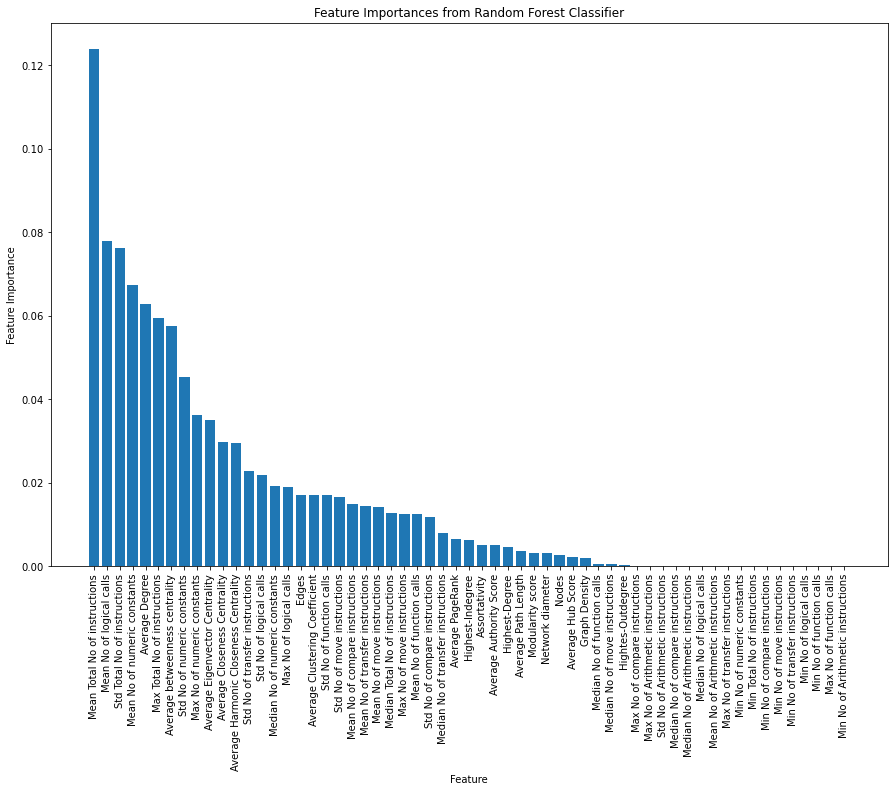

In [450]:
plt.figure(figsize=(15,10))
plt.bar(range(X.shape[1]), importances[sorted_idx])
plt.xticks(range(X.shape[1]), X.columns[sorted_idx], rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importances from Random Forest Classifier')
plt.show()

In [451]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 10-fold cross-validation
k = 10
scores = cross_val_score(rf_classifier, X, y, cv=k)

# Print the accuracy for each fold
for i in range(k):
    print(f"Fold {i+1} accuracy: {scores[i]:.4f}")

# Print the average accuracy across all folds
print(f"Average accuracy: {scores.mean():.4f}")


Fold 1 accuracy: 1.0000
Fold 2 accuracy: 1.0000
Fold 3 accuracy: 1.0000
Fold 4 accuracy: 1.0000
Fold 5 accuracy: 0.9714
Fold 6 accuracy: 1.0000
Fold 7 accuracy: 1.0000
Fold 8 accuracy: 0.9706
Fold 9 accuracy: 1.0000
Fold 10 accuracy: 1.0000
Average accuracy: 0.9942


Svm Classifier

In [452]:
from sklearn.svm import SVC 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
model = SVC(C=1000)
model.fit(X_train, y_train)

SVC(C=1000)

In [453]:
y_pred = model.predict(X_test)

In [454]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

1.0


In [455]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

svm_classifier = SVC(C=1000)

k = 10
scores = cross_val_score(svm_classifier, X, y, cv=k)

# Print the accuracy for each fold
for i in range(k):
    print(f"Fold {i+1} accuracy: {scores[i]:.4f}")

# Print the average accuracy across all folds
print(f"Average accuracy: {scores.mean():.4f}")

Fold 1 accuracy: 1.0000
Fold 2 accuracy: 1.0000
Fold 3 accuracy: 1.0000
Fold 4 accuracy: 1.0000
Fold 5 accuracy: 0.9714
Fold 6 accuracy: 1.0000
Fold 7 accuracy: 1.0000
Fold 8 accuracy: 1.0000
Fold 9 accuracy: 1.0000
Fold 10 accuracy: 1.0000
Average accuracy: 0.9971


Neural Network Model

In [456]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from numpy import unique,argmax

In [457]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25)
n_features = X.shape[1]
n_class = len(unique(y))

In [458]:
model = Sequential()
model.add(Dense(20, input_dim=n_features, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(n_class, activation='softmax'))

In [459]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [460]:
model.fit(xtrain, ytrain, validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
18/18 [==============================] - 1s 12ms/step - loss: 0.6715 - accuracy: 0.6453 - val_loss: 0.5928 - val_accuracy: 0.7093
Epoch 2/150
18/18 [==============================] - 0s 4ms/step - loss: 0.5433 - accuracy: 0.7035 - val_loss: 0.5250 - val_accuracy: 0.7093
Epoch 3/150
18/18 [==============================] - 0s 4ms/step - loss: 0.4895 - accuracy: 0.7035 - val_loss: 0.4772 - val_accuracy: 0.7093
Epoch 4/150
18/18 [==============================] - 0s 4ms/step - loss: 0.4365 - accuracy: 0.7442 - val_loss: 0.4243 - val_accuracy: 0.7558
Epoch 5/150
18/18 [==============================] - 0s 4ms/step - loss: 0.3920 - accuracy: 0.7965 - val_loss: 0.3795 - val_accuracy: 0.8256
Epoch 6/150
18/18 [==============================] - 0s 4ms/step - loss: 0.3482 - accuracy: 0.8605 - val_loss: 0.3387 - val_accuracy: 0.8256
Epoch 7/150
18/18 [==============================] - 0s 4ms/step - loss: 0.3105 - accuracy: 0.8953 - val_loss: 0.3055 - val_accuracy: 0.8605
Epoch 8/150


Epoch 59/150
18/18 [==============================] - 0s 4ms/step - loss: 0.0200 - accuracy: 0.9942 - val_loss: 0.0894 - val_accuracy: 0.9651
Epoch 60/150
18/18 [==============================] - 0s 4ms/step - loss: 0.0190 - accuracy: 0.9942 - val_loss: 0.0853 - val_accuracy: 0.9651
Epoch 61/150
18/18 [==============================] - 0s 4ms/step - loss: 0.0177 - accuracy: 0.9942 - val_loss: 0.0878 - val_accuracy: 0.9651
Epoch 62/150
18/18 [==============================] - 0s 4ms/step - loss: 0.0171 - accuracy: 0.9942 - val_loss: 0.0869 - val_accuracy: 0.9651
Epoch 63/150
18/18 [==============================] - 0s 5ms/step - loss: 0.0171 - accuracy: 0.9942 - val_loss: 0.0856 - val_accuracy: 0.9651
Epoch 64/150
18/18 [==============================] - 0s 4ms/step - loss: 0.0161 - accuracy: 0.9942 - val_loss: 0.0819 - val_accuracy: 0.9651
Epoch 65/150
18/18 [==============================] - 0s 4ms/step - loss: 0.0156 - accuracy: 0.9942 - val_loss: 0.0836 - val_accuracy: 0.9651
Epoch 

18/18 [==============================] - 0s 4ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0714 - val_accuracy: 0.9767
Epoch 117/150
18/18 [==============================] - 0s 4ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0746 - val_accuracy: 0.9767
Epoch 118/150
18/18 [==============================] - 0s 4ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0729 - val_accuracy: 0.9767
Epoch 119/150
18/18 [==============================] - 0s 4ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0727 - val_accuracy: 0.9767
Epoch 120/150
18/18 [==============================] - 0s 4ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0720 - val_accuracy: 0.9767
Epoch 121/150
18/18 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0718 - val_accuracy: 0.9767
Epoch 122/150
18/18 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0713 - val_accuracy: 0.9767
Epoch 123/150

In [461]:
yhat = model.predict(xtest)

In [462]:
yhat = argmax(yhat, axis=-1).astype('int')
acc = accuracy_score(ytest, yhat)
print('Accuracy: %.3f' % acc)

Accuracy: 1.000


# WITH PCA WITH  NORMALIZATION

In [463]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X)

columns = []
for i in range(1,21):
    columns.append('pc'+str(i))

principal_Df = pd.DataFrame(data = principalComponents
             , columns = columns)
principal_Df.head()
X = principal_Df

Random Forest Classifier

In [464]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed

# Train the model
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

In [465]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Get feature importances
importances = clf.feature_importances_

# Sort feature importances in descending order
sorted_idx = np.argsort(importances)[::-1]

# Print feature importances
print("Feature Importances:")
for i in range(X.shape[1]):
    print(f"{i+1}. Feature '{X.columns[sorted_idx[i]]}': {importances[sorted_idx[i]]}")


Accuracy: 0.9770114942528736
Feature Importances:
1. Feature 'pc2': 0.2601894755882225
2. Feature 'pc1': 0.17698202688250844
3. Feature 'pc5': 0.10436125235209984
4. Feature 'pc9': 0.07891032987212239
5. Feature 'pc6': 0.05550061418456108
6. Feature 'pc4': 0.04005739482298753
7. Feature 'pc15': 0.0340569843363294
8. Feature 'pc11': 0.03270111025431647
9. Feature 'pc18': 0.03236095628396871
10. Feature 'pc16': 0.027105423490158338
11. Feature 'pc7': 0.026669125437161267
12. Feature 'pc20': 0.02496592812782913
13. Feature 'pc8': 0.01980318987731125
14. Feature 'pc14': 0.018301117658901925
15. Feature 'pc12': 0.016073016899947678
16. Feature 'pc13': 0.01581726331420293
17. Feature 'pc3': 0.012755921559641663
18. Feature 'pc17': 0.008751522778210395
19. Feature 'pc10': 0.007950810545075689
20. Feature 'pc19': 0.006686535734443487


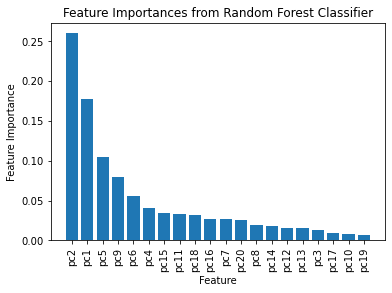

In [466]:
plt.bar(range(X.shape[1]), importances[sorted_idx])
plt.xticks(range(X.shape[1]), X.columns[sorted_idx], rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importances from Random Forest Classifier')
plt.show()

In [467]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 10-fold cross-validation
k = 10
scores = cross_val_score(rf_classifier, X, y, cv=k)

# Print the accuracy for each fold
for i in range(k):
    print(f"Fold {i+1} accuracy: {scores[i]:.4f}")

# Print the average accuracy across all folds
print(f"Average accuracy: {scores.mean():.4f}")


Fold 1 accuracy: 1.0000
Fold 2 accuracy: 1.0000
Fold 3 accuracy: 1.0000
Fold 4 accuracy: 0.9714
Fold 5 accuracy: 0.9429
Fold 6 accuracy: 0.9706
Fold 7 accuracy: 0.9706
Fold 8 accuracy: 0.9412
Fold 9 accuracy: 1.0000
Fold 10 accuracy: 0.9706
Average accuracy: 0.9767


Svm Classifier

In [468]:
from sklearn.svm import SVC 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
model = SVC(C=1000)
model.fit(X_train, y_train)

SVC(C=1000)

In [469]:
y_pred = model.predict(X_test)

In [470]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

1.0


In [471]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

svm_classifier = SVC(C=1000)

k = 10
scores = cross_val_score(svm_classifier, X, y, cv=k)

# Print the accuracy for each fold
for i in range(k):
    print(f"Fold {i+1} accuracy: {scores[i]:.4f}")

# Print the average accuracy across all folds
print(f"Average accuracy: {scores.mean():.4f}")

Fold 1 accuracy: 1.0000
Fold 2 accuracy: 1.0000
Fold 3 accuracy: 1.0000
Fold 4 accuracy: 1.0000
Fold 5 accuracy: 0.9714
Fold 6 accuracy: 1.0000
Fold 7 accuracy: 1.0000
Fold 8 accuracy: 1.0000
Fold 9 accuracy: 1.0000
Fold 10 accuracy: 1.0000
Average accuracy: 0.9971


Neural Network Model

In [472]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from numpy import unique,argmax

In [473]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25)
n_features = X.shape[1]
n_class = len(unique(y))

In [474]:
model = Sequential()
model.add(Dense(20, input_dim=n_features, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(n_class, activation='softmax'))

In [475]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [476]:
model.fit(xtrain, ytrain, validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
18/18 [==============================] - 1s 12ms/step - loss: 0.7110 - accuracy: 0.4244 - val_loss: 0.6634 - val_accuracy: 0.6628
Epoch 2/150
18/18 [==============================] - 0s 4ms/step - loss: 0.6597 - accuracy: 0.7267 - val_loss: 0.6247 - val_accuracy: 0.8140
Epoch 3/150
18/18 [==============================] - 0s 4ms/step - loss: 0.6173 - accuracy: 0.8372 - val_loss: 0.5917 - val_accuracy: 0.8953
Epoch 4/150
18/18 [==============================] - 0s 4ms/step - loss: 0.5767 - accuracy: 0.8779 - val_loss: 0.5560 - val_accuracy: 0.8953
Epoch 5/150
18/18 [==============================] - 0s 4ms/step - loss: 0.5348 - accuracy: 0.9302 - val_loss: 0.5191 - val_accuracy: 0.9419
Epoch 6/150
18/18 [==============================] - 0s 4ms/step - loss: 0.4911 - accuracy: 0.9709 - val_loss: 0.4798 - val_accuracy: 0.9767
Epoch 7/150
18/18 [==============================] - 0s 4ms/step - loss: 0.4442 - accuracy: 0.9709 - val_loss: 0.4370 - val_accuracy: 0.9767
Epoch 8/150


Epoch 59/150
18/18 [==============================] - 0s 4ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0628 - val_accuracy: 0.9767
Epoch 60/150
18/18 [==============================] - 0s 4ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0622 - val_accuracy: 0.9884
Epoch 61/150
18/18 [==============================] - 0s 4ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0624 - val_accuracy: 0.9884
Epoch 62/150
18/18 [==============================] - 0s 4ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0621 - val_accuracy: 0.9884
Epoch 63/150
18/18 [==============================] - 0s 4ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0616 - val_accuracy: 0.9884
Epoch 64/150
18/18 [==============================] - 0s 4ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0618 - val_accuracy: 0.9884
Epoch 65/150
18/18 [==============================] - 0s 4ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0617 - val_accuracy: 0.9884
Epoch 

18/18 [==============================] - 0s 4ms/step - loss: 9.6575e-04 - accuracy: 1.0000 - val_loss: 0.0622 - val_accuracy: 0.9884
Epoch 117/150
18/18 [==============================] - 0s 4ms/step - loss: 9.3994e-04 - accuracy: 1.0000 - val_loss: 0.0619 - val_accuracy: 0.9884
Epoch 118/150
18/18 [==============================] - 0s 4ms/step - loss: 9.1918e-04 - accuracy: 1.0000 - val_loss: 0.0619 - val_accuracy: 0.9884
Epoch 119/150
18/18 [==============================] - 0s 4ms/step - loss: 8.9997e-04 - accuracy: 1.0000 - val_loss: 0.0620 - val_accuracy: 0.9884
Epoch 120/150
18/18 [==============================] - 0s 4ms/step - loss: 8.7909e-04 - accuracy: 1.0000 - val_loss: 0.0621 - val_accuracy: 0.9884
Epoch 121/150
18/18 [==============================] - 0s 4ms/step - loss: 8.6376e-04 - accuracy: 1.0000 - val_loss: 0.0624 - val_accuracy: 0.9884
Epoch 122/150
18/18 [==============================] - 0s 4ms/step - loss: 8.4461e-04 - accuracy: 1.0000 - val_loss: 0.0623 - val_ac

In [477]:
yhat = model.predict(xtest)

In [478]:
yhat = argmax(yhat, axis=-1).astype('int')
acc = accuracy_score(ytest, yhat)
print('Accuracy: %.3f' % acc)

Accuracy: 0.989
